## Методические указания по выполнению лабораторной работы №3

**Тема: Обнаружение объектов с использованием Faster R-CNN**

**Цель работы:** Ознакомиться с архитектурой Faster R-CNN и принципами двухэтапного обнаружения объектов.

**Задачи:**
- Изучить теоретические основы двухэтапного обнаружения объектов: роль RPN и классификационного этапа в Faster R-CNN.
- Загрузить предобученную модель Faster R-CNN.
- Ознакомиться с форматом аннотаций для обучения в задаче детекции.
- Визуализировать предсказания, проанализировать ошибки модели и провести исследование по поиску баланса FN/FP.

### 1. Теоретическая часть

В данной лабораторной работе мы познакомимся с задачей детекции на примере архитектуры [Faster R-CNN](https://arxiv.org/pdf/1506.01497), обученной на наборе данных [COCO](https://cocodataset.org/#home), а также с новым форматом данных для обучения нейро-сетевых моделей детекции. Для оценки модели воспользуемся набором данных [Pascal VOC 2007](http://host.robots.ox.ac.uk/pascal/VOC/).

**Перед тем, как приступать к выполнению практической части, ознакомьтесь с первоисточниками используемых компонентов, а также документацией по [ссылке](https://pytorch.org/vision/master/models/faster_rcnn.html), включающей подробности работы с моделью и новым форматом данных, сэмплы кода.**

#### 1.1 Архитектура Faster R-CNN

Существует два основных подхода к обнаружению объектов:
Двухстадийные модели – более точные, но медленные.
Одностадийные модели – быстрые, но менее точные.

Faster R-CNN — это двухэтапная модель детекции объектов. В отличие от ResNeXt, Faster R-CNN не просто классифицирует изображение, а находит на нём несколько объектов, предсказывает bounding boxes и присваивает метки классам. Она состоит из следующих компонентов:

1. Backbone (ResNet/VGG/MobileNet) – извлекает признаки из изображения. Генерация регионов-кандидатов.
2. Region Proposal Network (RPN) – предлагает области, где могут находиться объекты. Подавление немаксимумовс с помощью якорных рамок и оценки вероятности содержания объекта.
3. ROI Pooling + Fully Connected Layers – классифицирует объекты и уточняет bounding boxes. Отбор регионов с наивысшими рейтингами.
4. Non-Maximum Suppression (NMS) – убирает дублирующиеся предсказания. Подавление немаксимумов. Остаются кандидаты с наибольшей вероятностью содержания объектов, для избежания повторений.


В предыдущих лабораторных работах мы познакомились с классификацией изображений, где модель предсказывает единственный класс для всего изображения. Однако во многих задачах компьютерного зрения классификация недостаточна. Например, когда на одном изображении присутствуют несколько объектов разных классов необходимо не только определить, что изображено, но и где это находится.

Faster R-CNN –  модель, которая также решает задачу обнаружения объектов, добавляя к классификации локализацию. 

#### 1.2 Формат данных для задачи детекции

Faster R-CNN требует разметки изображений, помимо классов включающей в себя и координаты bounding box по оси x, y.
Ознакомьтесь с форматом набора данных Pascal VOC, скачайте аннотации набора данных и изучите структуру **.xml** файлов в папке Annotations по [ссылке](http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtestnoimgs_06-Nov-2007.tar).

#### 1.3 Оценка качества

Помимо известных вам инструментов оценить качество работы детектора могут помочь:

Confidence Score - значение, указывающее на уверенность модели в том, что на данном месте изображения находится объект. Модель предсказывает этот параметр для каждого предсказанного bounding box. Чем выше confidence score, тем более уверена модель в своём предсказании.

Фильтрация предсказаний - модель может предсказать много объектов, но не все из них будут точными. Чтобы уменьшить количество ложных срабатываний (False Positives), применяется фильтр предсказаний, используя confidence threshold. Если confidence score меньше заданного порога - предсказание отбрасывается.


### 2. Практическая часть

#### 2.1 Подготовка окружения

Установите зависимости и библиотеки:

In [1]:
# импорт пакетов
%pip install torch torchvision torchaudio
%pip install opencv-python
%pip install matplotlib
%pip install numpy
%pip install scipy
%pip install pillow
%pip install tensorboard
%pip install pycocotools

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import torch
import torchvision
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator
from torchvision.transforms import functional as F
from torch.utils.data import DataLoader, Dataset
import numpy as np
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

#### 2.2 Подготовка модели

Загрузите предобученную модель, определите устройство, переведите модель в режим инференса:

In [3]:
# Определение устройства (CPU или GPU)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(f"Используемое устройство: {device}")

# Загрузка предобученной модели Faster R-CNN
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

# Перемещение модели на выбранное устройство
model.to(device)

# Перевод модели в режим инференса (вывода)
model.eval()

print("Модель загружена и переведена в режим инференса.")

Используемое устройство: cpu


c:\Users\Violetta\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Violetta\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Модель загружена и переведена в режим инференса.


#### 2.3 Загрузка и предобработка изображений


Затем импортируйте датасет из соответствующих пакетов PyTorch и определите метод трансформации данных для подачи в модель. Он понадобится позже для преобразования изображений при прямом проходе через модель чтобы получить предсказания:

In [4]:
# Определение метода трансформации данных
transform = transforms.Compose([
    transforms.ToTensor(),  # Преобразование изображения в тензор
])

# Загрузка датасета Pascal VOC
dataset = datasets.VOCDetection(
    root='./data',  # Путь, куда будут загружены данные
    year='2012',    # Год выпуска датасета
    image_set='train',  # Набор данных (train, trainval, val)
    download=True,  # Загрузить датасет, если он отсутствует
    transform=transform  # Применение трансформаций к изображениям
)

# Создание DataLoader для пакетной обработки
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

print("Датасет Pascal VOC загружен, метод трансформации определен.")

Датасет Pascal VOC загружен, метод трансформации определен.


#### 2.4 Объявление методов для работы с данными

Далее необходимо создать методы препроцессинга: метод чтения файла аннотации для возврата numpy-объекта содержащего bounding boxes, и метод отрисовки истиных и прогнозных bounding boxes на изображении для визуализации полученных результатов.

In [5]:
from PIL import Image, ImageDraw
import xml.etree.ElementTree as ET

def parse_voc_annotation(xml_path): # Парсит XML-файл аннотации в формате VOC и возвращает bounding boxes в виде numpy-массива
    tree = ET.parse(xml_path) # Aргумент: xml_path (str): Путь к XML-файлу аннотации
    root = tree.getroot()
    boxes = [] # Вывод: np.array: Массив bounding boxes в формате [[xmin, ymin, xmax, ymax], ...]
    for obj in root.findall("object"):
        bbox = obj.find("bndbox")
        xmin, ymin, xmax, ymax = (int(bbox.find("xmin").text), int(bbox.find("ymin").text),
                                  int(bbox.find("xmax").text), int(bbox.find("ymax").text))
        boxes.append([xmin, ymin, xmax, ymax])
    return np.array(boxes)

def draw_predictions(image, boxes, labels=None, scores=None, color="blue"): # Рисует bounding boxes на изображении
    draw = ImageDraw.Draw(image) # Изображение, на котором нужно нарисовать bounding boxes
    for i, box in enumerate(boxes): # Итерируемся по списку boxes, где i - индекс текущего элемента, box - текущий элемент (координаты рамки)
        xmin, ymin, xmax, ymax = map(int, box) # Преобразуем координаты рамки (xmin, ymin, xmax, ymax) в целые числа
        draw.rectangle([xmin, ymin, xmax, ymax], outline=color, width=2)  # Рисуем прямоугольник на изображении с заданными координатами, цветом и толщиной линии
        if labels is not None and scores is not None:# Проверяем, переданы ли метки (labels) и оценки (scores)
            label_text = f"{labels[i]} ({scores[i]:.2f})" # Формируем текст метки, который включает название метки и оценку с округлением до двух знаков после запятой
            draw.text((xmin, ymin), label_text, fill=color) # Добавляем текст метки на изображение в координаты (xmin, ymin) с заданным цветом
    
    return image # Возвращаем измененное изображение с нарисованными прямоугольниками и метками

#### 2.5 Анализ False Positives / False Negatives

Для измерения того, насколько хорошо bounding box предсказан, применяется параметр IoU (Intersection over Union) между двумя bounding boxes. Чем он выше, тем точнее предсказание. Для его оценки опишем следующий метод, принимающий два np.array-объекта (прогнозные и истинные координаты):

In [6]:
def calculate_iou(pred_box, gt_box):
    x1, y1, x2, y2 = pred_box # Извлечение координат прогнозного bounding box
    x1g, y1g, x2g, y2g = gt_box # Извлечение координат истинного bounding box
    
# Вычисление координат пересечения (intersection)
    xi1 = max(x1, x1g)  # Максимальная x-координата левого верхнего угла пересечения
    yi1 = max(y1, y1g)  # Максимальная y-координата левого верхнего угла пересечения
    xi2 = min(x2, x2g)  # Минимальная x-координата правого нижнего угла пересечения
    yi2 = min(y2, y2g)  # Минимальная y-координата правого нижнего угла пересечения

# Вычисление площади пересечения
    inter_area = max(0, xi2 - xi1) * max(0, yi2 - yi1)
# Вычисление площадей прогнозного и истинного bounding boxes
    box1_area = (x2 - x1) * (y2 - y1)  # Площадь прогнозного bounding box
    box2_area = (x2g - x1g) * (y2g - y1g)  # Площадь истинного bounding box

    union_area = box1_area + box2_area - inter_area
    return inter_area / union_area if union_area > 0 else 0 # Значение IoU (от 0 до 1), где 1 означает полное совпадение bounding boxes

#### 2.6 Оценка модели и визуализация результатов

Выполните прямой проход нескольких изображений через модель. Для этого необходимо загрузить изображения и аннотации, применить преобразование изображений в тензор. Затем получите выходы модели:

Имена файлов первых N изображений:
2008_000008.jpg
2008_000015.jpg
2008_000019.jpg
2008_000023.jpg
2008_000028.jpg


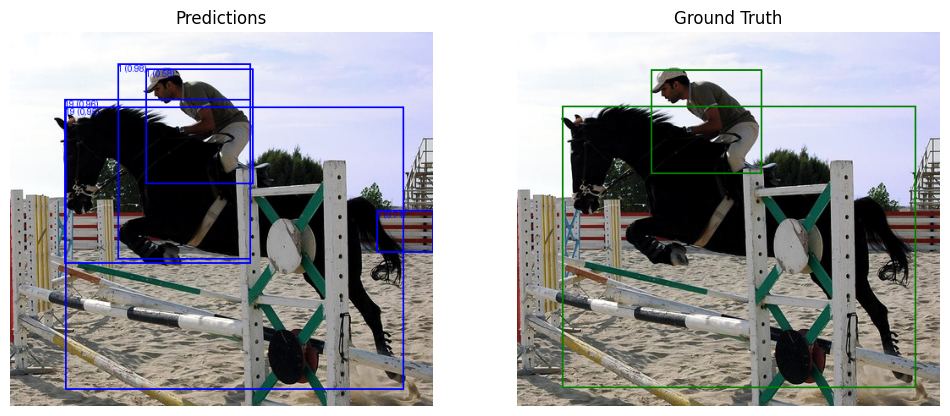

Изображение 1:
  True Positives (TP): 2
  False Positives (FP): 3
  False Negatives (FN): 0
  Средний IoU: 0.51


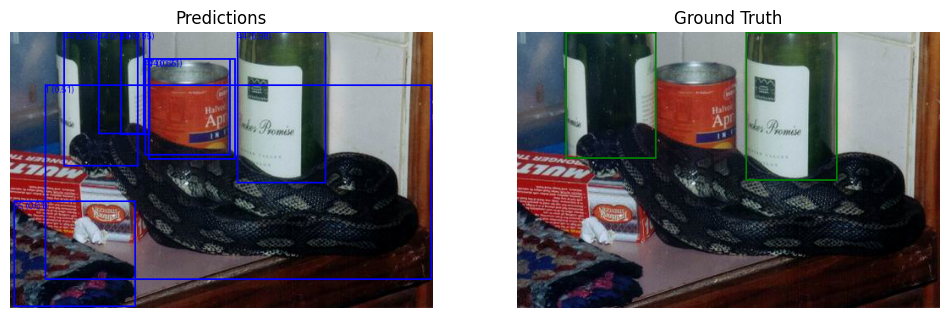

Изображение 2:
  True Positives (TP): 2
  False Positives (FP): 6
  False Negatives (FN): 0
  Средний IoU: 0.31


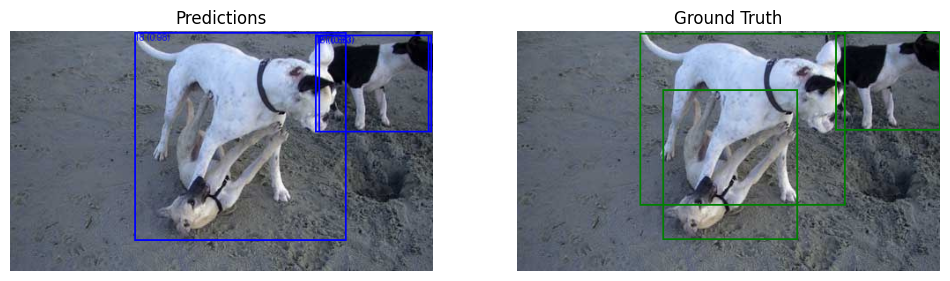

Изображение 3:
  True Positives (TP): 3
  False Positives (FP): 0
  False Negatives (FN): 0
  Средний IoU: 0.82


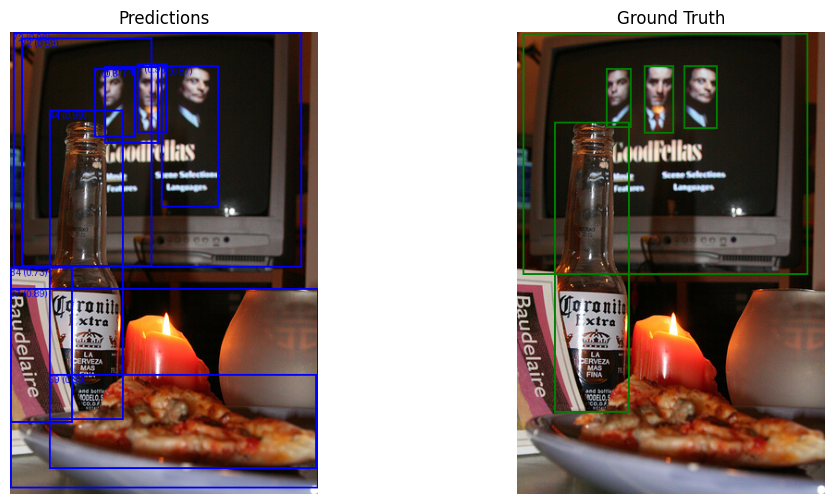

Изображение 4:
  True Positives (TP): 4
  False Positives (FP): 6
  False Negatives (FN): 1
  Средний IoU: 0.46


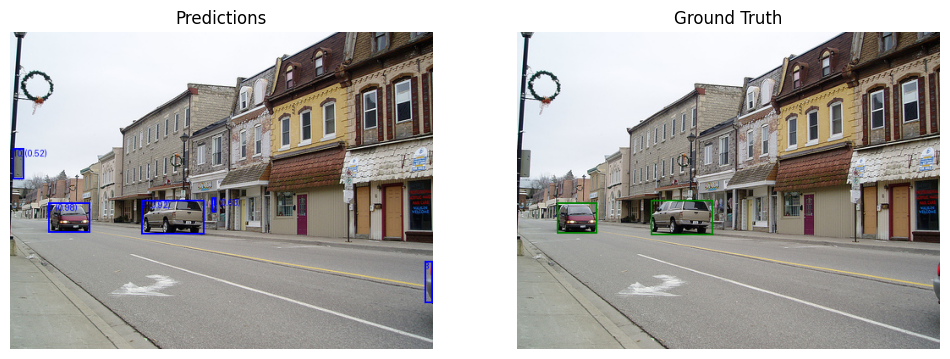

Изображение 5:
  True Positives (TP): 2
  False Positives (FP): 3
  False Negatives (FN): 0
  Средний IoU: 0.37


In [ ]:
# выберите N изображений 5 из датасета
N = 5
image_filenames = [dataset[i][1]['annotation']['filename'] for i in range(N)]
print("Имена файлов первых N изображений:")
for filename in image_filenames:
    print(filename)

# объявите цикл для проверки
for i, filename in enumerate(image_filenames):

    # загрузите изображение и его разметку
    image_path = f"./data/VOCdevkit/VOC2012/JPEGImages/{filename}"  # Путь к изображениям
    annotation_path = f"./data/VOCdevkit/VOC2012/Annotations/{filename.replace('.jpg', '.xml')}"  # Путь к аннотациям
    image = Image.open(image_path).convert("RGB")  # Загрузка изображения
    gt_boxes = parse_voc_annotation(annotation_path)  # Парсинг аннотаций
    
    # примените трансформации
    image_tensor = transform(image).unsqueeze(0).to(device)  # Добавление batch dimension и перемещение на устройство

    # выполните прямой проход
    with torch.no_grad():
        outputs = model(image_tensor)

    # извлекаем bounding boxes, метки и confidence scores из полученных выходов модели
    pred_boxes = outputs[0]['boxes'].cpu().numpy()
    pred_labels = outputs[0]['labels'].cpu().numpy()
    pred_scores = outputs[0]['scores'].cpu().numpy()

    # установите порог confidence_threshold в эмпирическом значении
    confidence_threshold = 0.5

    # Применение фильтра к предсказанным bounding boxes на основе порога уверенности (confidence threshold)
    # keep - это булев массив, где каждый элемент указывает, превышает ли соответствующий pred_score порог confidence_threshold
    keep = pred_scores >= confidence_threshold

    # Фильтрация предсказанных bounding boxes:
    # Оставляем только те bounding boxes, для которых pred_score >= confidence_threshold
    pred_boxes = pred_boxes[keep]

    # Фильтрация меток (labels) предсказанных bounding boxes:
    # Оставляем только те метки, которые соответствуют bounding boxes с pred_score >= confidence_threshold
    pred_labels = pred_labels[keep]

    # Фильтрация confidence scores:
    # Оставляем только те scores, которые >= confidence_threshold
    pred_scores = pred_scores[keep]

    # Отрисовка bounding boxes с предсказаниями (синий цвет)
    image_with_preds = draw_predictions(image.copy(), pred_boxes, pred_labels, pred_scores, color="blue")

    # Отрисовка bounding boxes с реальной разметкой (зеленый цвет)
    image_with_gt = draw_predictions(image.copy(), gt_boxes, color="green")  
    
    # Визуализация изображений
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title("Predictions")
    plt.imshow(image_with_preds)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Ground Truth")
    plt.imshow(image_with_gt)
    plt.axis("off")

    plt.show()
    
    # вычислите IoU для выбранных изображений
def calculate_iou(pred_box, gt_box):
    x1, y1, x2, y2 = pred_box # Извлечение координат предсказанного bounding box (x1, y1 - левый верхний угол, x2, y2 - правый нижний угол)
    x1g, y1g, x2g, y2g = gt_box # Тоже самое с истинным
    
    # Вычисление координат пересечения (intersection) двух bounding boxes
    # xi1, yi1 - координаты левого верхнего угла пересечения
    xi1 = max(x1, x1g)  # Максимальная x-координата левого верхнего угла пересечения
    yi1 = max(y1, y1g)  # Максимальная y-координата 
    # xi2, yi2 - координаты правого нижнего угла пересечения
    xi2 = min(x2, x2g)  # Минимальная x-координата правого нижнего угла пересечения
    yi2 = min(y2, y2g)  # Минимальная y-координата 

    # Вычисление площади пересечения (intersection area)
    inter_area = max(0, xi2 - xi1) * max(0, yi2 - yi1)
    
    # Вычисление площади предсказанного bounding box
    box1_area = (x2 - x1) * (y2 - y1)
    
    # Вычисление площади истинного bounding box
    box2_area = (x2g - x1g) * (y2g - y1g)

    # Вычисление площади объединения (union area) двух bounding boxes
    union_area = box1_area + box2_area - inter_area
    
    # Возвращение значения IoU (Intersection over Union). Если площадь объединения равна 0, возвращается 0 (во избежание деления на ноль)
    return inter_area / union_area if union_area > 0 else 0
    
# Вычисление IoU для каждого предсказания
ious = []  # Создание списка для хранения значений IoU
for pred_box in pred_boxes:  # Итерация по всем предсказанным bounding boxes
    # Вычисление максимального IoU для текущего предсказанного bounding box относительно всех истинных bounding boxes
    iou = max(calculate_iou(pred_box, gt_box) for gt_box in gt_boxes)
    # Добавление вычисленного IoU в список
    ious.append(iou)
    
    # подсчитайте количество False Positive и False Negative для выбранных изображений
    tp = sum(iou >= 0.5 for iou in ious)  # True Positive (IoU >= 0.5)
    fp = len(pred_boxes) - tp  # False Positive
    fn = len(gt_boxes) - tp  # False Negative

    # Если модель не выдала ни одного bounding box, то все объекты в gt_boxes - это False Negatives
    if len(pred_boxes) == 0:
        fn = len(gt_boxes)

    print(f"Изображение {i + 1}:")
    print(f"  True Positives (TP): {tp}")
    print(f"  False Positives (FP): {fp}")
    print(f"  False Negatives (FN): {fn}")
    print(f"  Средний IoU: {np.mean(ious):.2f}")

#### 2.7 Поиск оптимальной конфигурации 

Проанализируйте полученные результаты с выбранным значением фильтрации предсказаний. Проведите исследование с целью поиска оптимального порога и баланса FN/FP. Обоснуйте полученные результаты:

Порог: 0.1
  Среднее TP: 4.40
  Среднее FP: 12.00
  Среднее FN: 0.00
  Средний IoU: 0.41

Порог: 0.3
  Среднее TP: 2.80
  Среднее FP: 5.80
  Среднее FN: 0.20
  Средний IoU: 0.44

Порог: 0.5
  Среднее TP: 2.60
  Среднее FP: 3.60
  Среднее FN: 0.20
  Средний IoU: 0.50

Порог: 0.7
  Среднее TP: 2.40
  Среднее FP: 2.20
  Среднее FN: 0.40
  Средний IoU: 0.56

Порог: 0.9
  Среднее TP: 1.60
  Среднее FP: 1.00
  Среднее FN: 1.20
  Средний IoU: 0.65



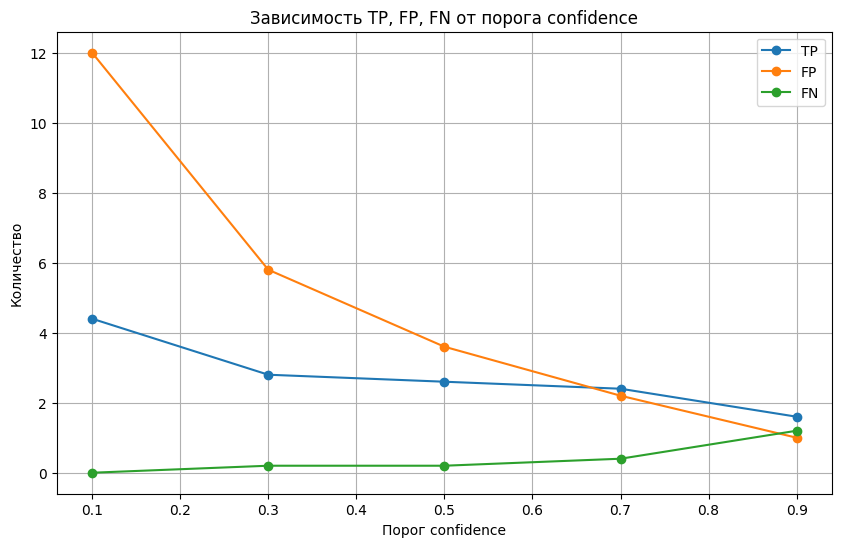

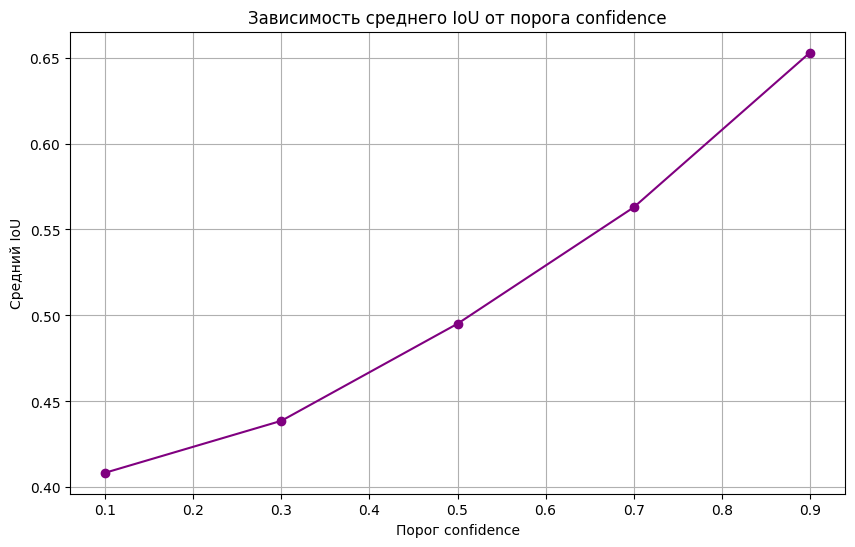

'\nНизкий порог (0.1–0.3):\n    Высокое количество TP и низкое FN, но много FP.\n    Подходит для задач, где важно минимизировать пропуски (FN), даже если это приводит к ложным срабатываниям (FP).\n\nСредний порог (0.5):\n    Умеренное количество TP, FP и FN.\n    Хороший баланс между точностью и полнотой. Подходит для большинства задач.\n\nВысокий порог (0.7–0.9):\n    Низкое количество FP, но высокое FN.\n    Подходит для задач, где критически важно минимизировать ложные срабатывания (FP), даже если это приводит к пропускам (FN)\n'

In [12]:
# исследование
# Список порогов для исследования
confidence_thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]

# Словарь для хранения результатов
results = {th: {"TP": [], "FP": [], "FN": [], "IoU": []} for th in confidence_thresholds}

# Цикл для проверки каждого порога
for threshold in confidence_thresholds:
    for i, filename in enumerate(image_filenames):
        # Загрузка изображения и его разметки
        image_path = f"./data/VOCdevkit/VOC2012/JPEGImages/{filename}"
        annotation_path = f"./data/VOCdevkit/VOC2012/Annotations/{filename.replace('.jpg', '.xml')}"
        image = Image.open(image_path).convert("RGB")
        gt_boxes = parse_voc_annotation(annotation_path)
        
        # Применение трансформаций и прямой проход через модель
        image_tensor = transform(image).unsqueeze(0).to(device)
        with torch.no_grad():
            outputs = model(image_tensor)

        # Извлечение bounding boxes, меток и confidence scores
        pred_boxes = outputs[0]['boxes'].cpu().numpy()
        pred_labels = outputs[0]['labels'].cpu().numpy()
        pred_scores = outputs[0]['scores'].cpu().numpy()

        # Фильтрация предсказаний по текущему порогу
        keep = pred_scores >= threshold
        pred_boxes = pred_boxes[keep]
        pred_labels = pred_labels[keep]
        pred_scores = pred_scores[keep]

        # Вычисление IoU для каждого предсказания
        ious = []
        for pred_box in pred_boxes:
            iou = max(calculate_iou(pred_box, gt_box) for gt_box in gt_boxes)
            ious.append(iou)

        # Подсчет TP, FP, FN
        tp = sum(iou >= 0.5 for iou in ious)
        fp = len(pred_boxes) - tp
        fn = max(0, len(gt_boxes) - tp)

        # Сохранение результатов
        results[threshold]["TP"].append(tp)
        results[threshold]["FP"].append(fp)
        results[threshold]["FN"].append(fn)
        results[threshold]["IoU"].append(np.mean(ious) if ious else 0)

# Вывод средних значений для каждого порога
for threshold, metrics in results.items():
    avg_tp = np.mean(metrics["TP"])
    avg_fp = np.mean(metrics["FP"])
    avg_fn = np.mean(metrics["FN"])
    avg_iou = np.mean(metrics["IoU"])
    print(f"Порог: {threshold}")
    print(f"  Среднее TP: {avg_tp:.2f}")
    print(f"  Среднее FP: {avg_fp:.2f}")
    print(f"  Среднее FN: {avg_fn:.2f}")
    print(f"  Средний IoU: {avg_iou:.2f}")
    print()
    
# Визуализация
    # Данные для графиков
thresholds = list(results.keys())
avg_tp = [np.mean(results[th]["TP"]) for th in thresholds]
avg_fp = [np.mean(results[th]["FP"]) for th in thresholds]
avg_fn = [np.mean(results[th]["FN"]) for th in thresholds]
avg_iou = [np.mean(results[th]["IoU"]) for th in thresholds]

# График TP, FP, FN
plt.figure(figsize=(10, 6))
plt.plot(thresholds, avg_tp, label="TP", marker="o")
plt.plot(thresholds, avg_fp, label="FP", marker="o")
plt.plot(thresholds, avg_fn, label="FN", marker="o")
plt.xlabel("Порог confidence")
plt.ylabel("Количество")
plt.title("Зависимость TP, FP, FN от порога confidence")
plt.legend()
plt.grid()
plt.show()

# График IoU
plt.figure(figsize=(10, 6))
plt.plot(thresholds, avg_iou, label="Средний IoU", marker="o", color="purple")
plt.xlabel("Порог confidence")
plt.ylabel("Средний IoU")
plt.title("Зависимость среднего IoU от порога confidence")
plt.grid()
plt.show()

"""
Низкий порог (0.1–0.3):
    Высокое количество TP и низкое FN, но много FP.
    Подходит для задач, где важно минимизировать пропуски (FN), даже если это приводит к ложным срабатываниям (FP).

Средний порог (0.5):
    Умеренное количество TP, FP и FN.
    Хороший баланс между точностью и полнотой. Подходит для большинства задач.

Высокий порог (0.7–0.9):
    Низкое количество FP, но высокое FN.
    Подходит для задач, где критически важно минимизировать ложные срабатывания (FP), даже если это приводит к пропускам (FN)
"""

*На основе результатов исследования можно сделать следующие выводы*:

**Низкий порог (0.1–0.3)**:
    Высокое количество TP и низкое FN, но много FP.
    Подходит для задач, где важно минимизировать пропуски (FN), даже если это приводит к ложным срабатываниям (FP).

**Средний порог (0.5)**:
    Умеренное количество TP, FP и FN.
    Хороший баланс между точностью и полнотой. Подходит для большинства задач.

**Высокий порог (0.7–0.9)**:
    Низкое количество FP, но высокое FN.
    Подходит для задач, где критически важно минимизировать ложные срабатывания (FP), даже если это приводит к пропускам (FN)
